# Нормализация и стандартизация

Установим новые библиотеки

Импортируем

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

## Стандартизация

In [2]:
X_train = np.array([[ 1., -1.,  2., 10],
                    [ 2.,  0.,  0., 10],
                    [ 0.,  1., -1., 1]])

In [3]:
X_train.mean(axis=0)

array([1.        , 0.        , 0.33333333, 7.        ])

In [4]:
X_train.std(axis=0)

array([0.81649658, 0.81649658, 1.24721913, 4.24264069])

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [6]:
scaler.mean_

array([1.        , 0.        , 0.33333333, 7.        ])

In [7]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913, 4.24264069])

In [8]:
X_scaled = scaler.transform(X_train)
X_scaled

array([[ 0.        , -1.22474487,  1.33630621,  0.70710678],
       [ 1.22474487,  0.        , -0.26726124,  0.70710678],
       [-1.22474487,  1.22474487, -1.06904497, -1.41421356]])

In [9]:
X_scaled.mean(axis=0)

array([0., 0., 0., 0.])

In [10]:
X_scaled.std(axis=0)

array([1., 1., 1., 1.])

---

Попробуем создать небольшой пайплайн

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
X, y = make_classification()

In [13]:
X -= 1
X

array([[-1.10827833, -0.96968757, -1.16283102, ..., -2.51564587,
        -0.7057796 ,  0.64630087],
       [-2.76706544, -1.50083209, -0.35295162, ...,  1.06942345,
        -1.82971232, -1.78059326],
       [-1.21900417,  0.50633042,  0.42059701, ...,  0.31974141,
         0.25029238, -1.86728005],
       ...,
       [-1.82093632, -1.52924511, -0.93042175, ..., -0.91672206,
         0.05164772, -0.07752698],
       [-2.02677599, -0.53468779, -1.82911803, ...,  0.23087425,
        -1.94088981, -2.19678919],
       [ 0.46717839, -0.76754574, -1.02995614, ..., -0.44119344,
        -0.50595873, -1.08243806]])

In [14]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
X.shape

(100, 20)

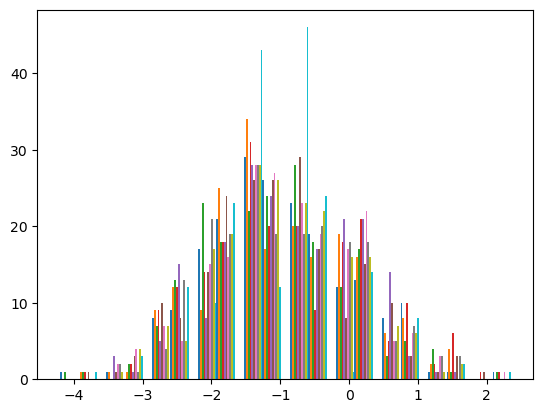

In [16]:
plt.hist(X);

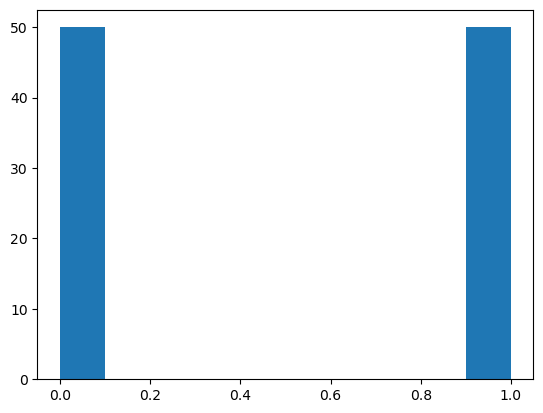

In [17]:
plt.hist(y);

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [20]:
pipe.fit(X_train, y_train)  

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [21]:
pipe.score(X_test, y_test) 

0.84

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8

In [23]:
X_test.shape

(25, 20)

In [24]:
y_pred = pipe.predict(X_test)

In [25]:
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0])

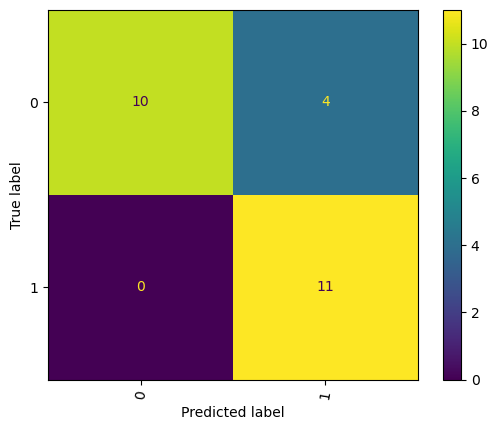

In [26]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(xticks_rotation=80)
plt.show()

## Нормализация

### Min-max scaler

In [27]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [28]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

---

In [29]:
X_train = np.array([[ 1.5, 40000],
                    [ 2.0, 95000],
                    [ 1.7, 140000],
                    [ 1.7, 50000],
                    [ 1.8, 80000]])

In [30]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.  , 0.  ],
       [1.  , 0.55],
       [0.4 , 1.  ],
       [0.4 , 0.1 ],
       [0.6 , 0.4 ]])

In [31]:
X_train_minmax * 100

array([[  0.,   0.],
       [100.,  55.],
       [ 40., 100.],
       [ 40.,  10.],
       [ 60.,  40.]])

In [32]:
X_train_minmax * 200 - 100

array([[-100., -100.],
       [ 100.,   10.],
       [ -20.,  100.],
       [ -20.,  -80.],
       [  20.,  -20.]])

In [33]:
np.array(
[[0, 255, 0],
[123, 22, 34],
[0, 55, 77]]) / 255

array([[0.        , 1.        , 0.        ],
       [0.48235294, 0.08627451, 0.13333333],
       [0.        , 0.21568627, 0.30196078]])

### Max-abs scaler

Mасштабируется таким образом, что обучающие данные лежат в пределах диапазона [-1, 1]  
Он предназначен для данных, которые уже сосредоточены на нуле или разреженных данных.

In [34]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [35]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_minabs = max_abs_scaler.fit_transform(X_train)
X_train_minabs

array([[ 0.5, -1. ,  1. ],
       [ 1. ,  0. ,  0. ],
       [ 0. ,  1. , -0.5]])

---

In [36]:
X_train = np.array([[ 1.5, 40],
                    [ 2.0, 95],
                    [ 1.7, 140],
                    [ 1.7, 50],
                    [ 1.8, 80]])

In [37]:
max_abs_scaler = preprocessing.MaxAbsScaler()
X_train_minabs = max_abs_scaler.fit_transform(X_train)
X_train_minabs

array([[0.75      , 0.28571429],
       [1.        , 0.67857143],
       [0.85      , 1.        ],
       [0.85      , 0.35714286],
       [0.9       , 0.57142857]])

---

## Влияние стандартизации на распределение

In [38]:
df = pd.DataFrame({
    'exponential': np.random.exponential(10, 1000),
    'normal_p': np.random.normal(10, 2, 1000) 
})

<AxesSubplot:title={'center':'Оригинальные распределения'}, xlabel='exponential', ylabel='Density'>

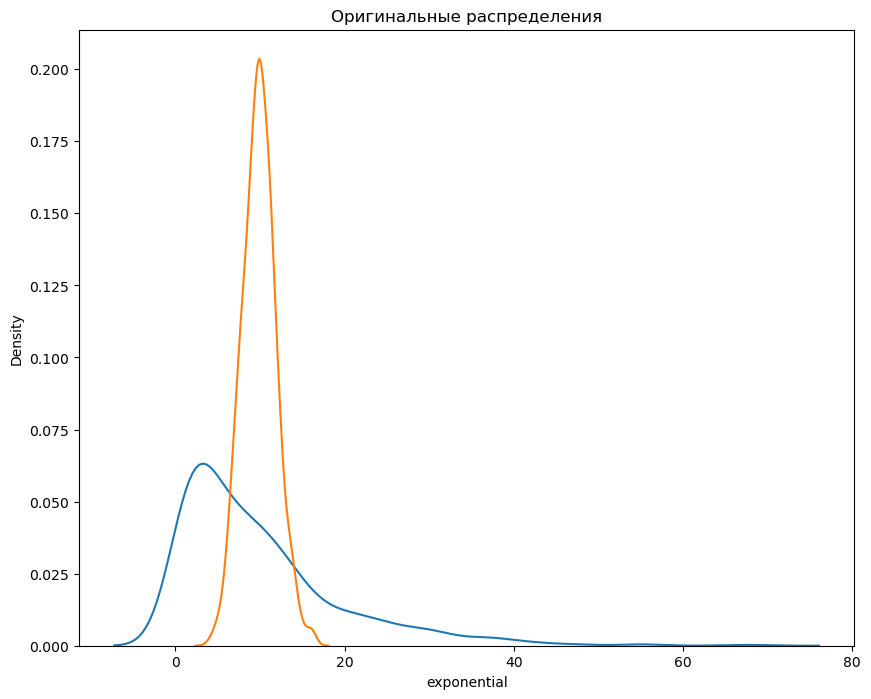

In [39]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))
ax1.set_title('Оригинальные распределения')

sns.kdeplot(df['exponential'], ax = ax1)
sns.kdeplot(df['normal_p'], ax = ax1)

Стандартизуем датасет

In [40]:
s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df)

Преобразуем промежуточный датасет в полноценный датафрейм для визуализации

In [41]:
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns = col_names)

Визуализируем

<AxesSubplot:title={'center':'После стандартизации'}, xlabel='exponential', ylabel='Density'>

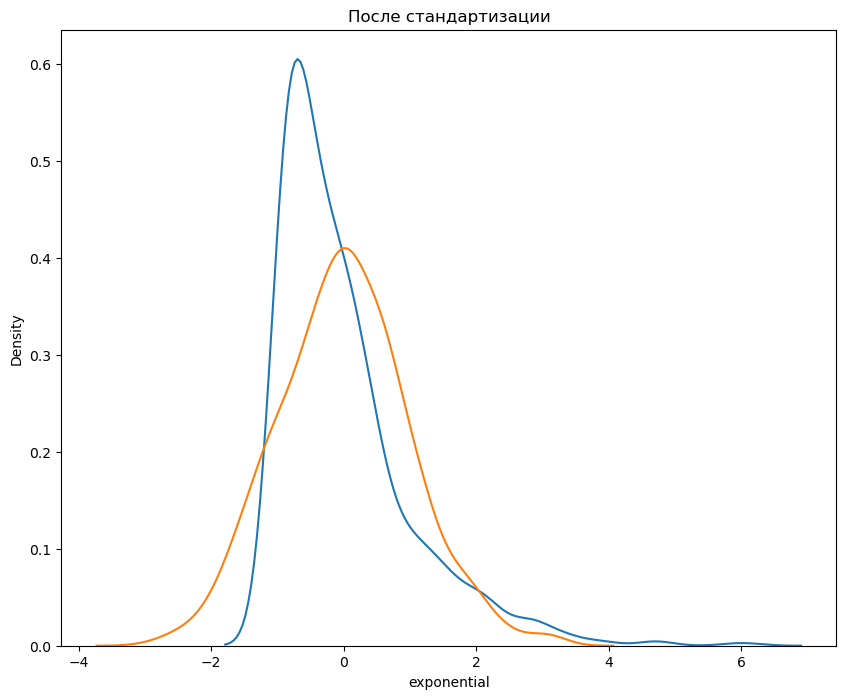

In [42]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))

ax1.set_title('После стандартизации')

sns.kdeplot(df_s['exponential'], ax = ax1)
sns.kdeplot(df_s['normal_p'], ax = ax1)

<AxesSubplot:title={'center':'До и после стандартизации'}, xlabel='normal_p', ylabel='Density'>

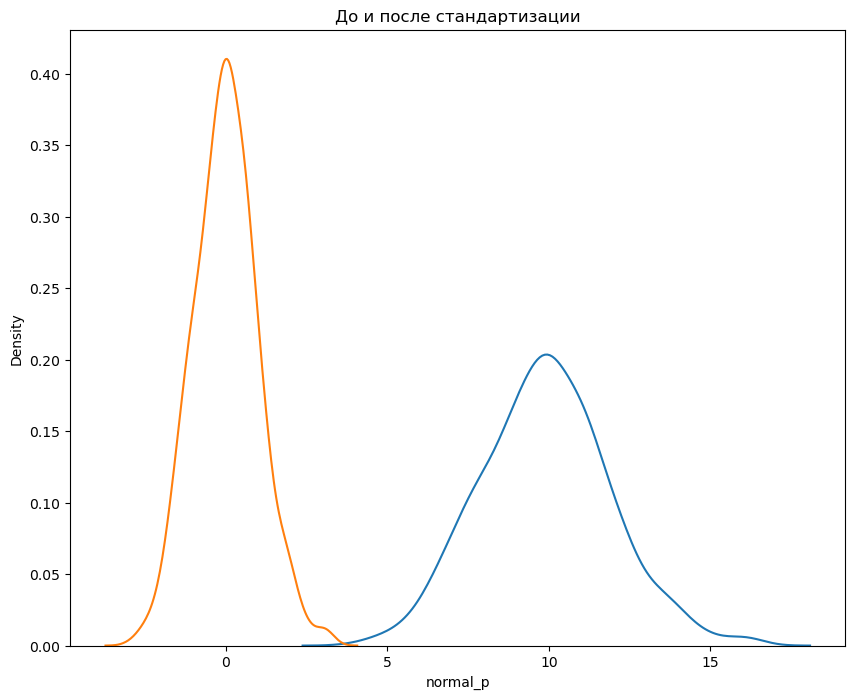

In [43]:
fig, (ax1) = plt.subplots(ncols = 1, figsize = (10, 8))

ax1.set_title('До и после стандартизации')
sns.kdeplot(df['normal_p'], ax = ax1)
sns.kdeplot(df_s['normal_p'], ax = ax1)